# Домашнаяя работа. Функции потерь и оптимизация

Задание:

Реализовать самостоятельно логистическую регрессию
- Обучить ее методом градиентного спуска
- Методом nesterov momentum
- Методом rmsprop

В качестве dataset'а взять Iris, оставив 2 класса:
- Iris Versicolor
- Iris Virginica

## 0. Библиотеки

In [63]:
# Работа с данными
import pandas as pd
import numpy as np

# Датасет
from sklearn import datasets

# Дополнительные фичи
from sklearn.model_selection import train_test_split

# Модели 
from sklearn.linear_model import LogisticRegression

#Визуализации
import seaborn as sns

/Users/akirichenko/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## 1. Работа с данными

In [52]:
# Загрузим датасет
dataset = datasets.load_iris()

In [74]:
X = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
Y = pd.DataFrame(dataset.target, columns=['target'])
Y['target_name'] = Y.apply(lambda row: dataset.target_names[row.target], axis=1)
data = pd.concat([X, Y], axis=1)

In [85]:
# Уберем ненужный класс setosa и оставим в датасете тольео Iris Versicolor Iris Virginica
data = data[(data.target_name!='setosa')].reset_index()
X = data.drop(['target', 'target_name'], axis=1)
y = data['target']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [87]:
data.head()

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,0,7.0,3.2,4.7,1.4,1,versicolor
1,1,6.4,3.2,4.5,1.5,1,versicolor
2,2,6.9,3.1,4.9,1.5,1,versicolor
3,3,5.5,2.3,4.0,1.3,1,versicolor
4,4,6.5,2.8,4.6,1.5,1,versicolor


## 2. Модель - Логистическая регрессия

In [104]:
# Обучение модели из коробки
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
predictions = model.predict(X_test)
model.score(X_test, y_test)

0.9666666666666667

In [122]:
plot_data = pd.concat([X_test, pd.DataFrame(y_test)], axis=1)
plot_data

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
26,26,6.8,2.8,4.8,1.4,1
86,86,6.3,3.4,5.6,2.4,2
2,2,6.9,3.1,4.9,1.5,1
55,55,7.6,3.0,6.6,2.1,2
75,75,7.2,3.2,6.0,1.8,2
93,93,6.8,3.2,5.9,2.3,2
16,16,5.6,3.0,4.5,1.5,1
73,73,6.3,2.7,4.9,1.8,2
54,54,6.5,3.0,5.8,2.2,2
95,95,6.7,3.0,5.2,2.3,2


In [102]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                style='predict', data=plot_data[(plot_data.predict=='1')]) 

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', 
                style='predict', data=plot_data[(plot_data.predict=='2')]) 

/Users/akirichenko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


KeyError: False

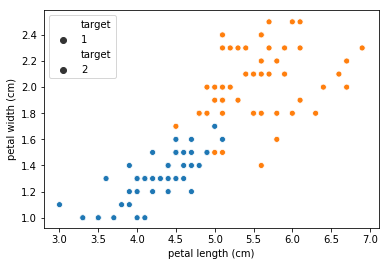

In [95]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', 
                style='target', data=plot_data[(plot_data.target_name=='versicolor')]) 

sns.scatterplot(x='petal length (cm)', y='petal width (cm)', 
                style='target', data=plot_data[(plot_data.target_name=='virginica')]) 

### 3.1 Метод градиентного спуска

### 3.2 Метод nesterov momentum

### 3.3 Метод rmsprop